In [1]:
import numpy as np
import tensorflow as tf

tf.random.set_seed(42)

tf.__version__

2022-03-03 21:21:16.727147: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-03 21:21:16.727176: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


'2.9.0-dev20220302'

In [2]:
X = np.array([[0,0], [0,1], [1,0], [1,1]])
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [3]:
y = np.array([[1], [0], [0], [1]])
y

array([[1],
       [0],
       [0],
       [1]])

In [4]:
X = tf.convert_to_tensor(X, dtype = tf.float32, name = 'X')
y = tf.convert_to_tensor(y, dtype = tf.float32, name = 'y')

2022-03-03 21:21:18.625827: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-03 21:21:18.626628: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-03 21:21:18.626661: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (lucas): /proc/driver/nvidia/version does not exist


In [5]:
neuronios_entrada = 2
neuronios_oculta = 3
neuronios_saida = 1

In [6]:
W = {'oculta': tf.Variable(tf.random.normal([neuronios_entrada, neuronios_oculta]), name = 'w_oculta'), 
     'saida': tf.Variable(tf.random.normal([neuronios_oculta, neuronios_saida]), name = 'w_saida')}

In [7]:
type(W)

dict

In [8]:
type(W['oculta'])

tensorflow.python.ops.resource_variable_ops.ResourceVariable

In [9]:
W['oculta']

<tf.Variable 'w_oculta:0' shape=(2, 3) dtype=float32, numpy=
array([[ 0.3274685, -0.8426258,  0.3194337],
       [-1.4075519, -2.3880599, -1.0392479]], dtype=float32)>

In [10]:
W['saida']

<tf.Variable 'w_saida:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.08422458],
       [-0.86090374],
       [ 0.37812304]], dtype=float32)>

/home/lucas/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

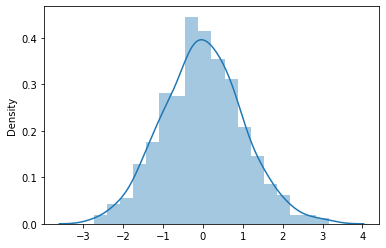

In [11]:
distribuicao = np.random.normal(size = 500)
import seaborn as sns
sns.distplot(distribuicao)

In [12]:
b = {'oculta': tf.Variable(tf.random.normal([neuronios_oculta]), name = 'b_oculta'),
     'saida': tf.Variable(tf.random.normal([neuronios_saida]), name = 'b_saida')}

No link a seguir, os desenvolvedores do TensorFlow falam que os otimizadores que antes estavam em `tf.train` passaram para dentro da API do Keras: https://www.tensorflow.org/guide/migrate#keras_optimizers

As métricas de perda também estão exclusivamente na API do Keras, não mais em `tf.losses`: https://www.tensorflow.org/guide/migrate#new-style_metrics_and_losses

In [ ]:
otimizador = tf.keras.optimizers.SGD(learning_rate = 0.3)

for epoca in range(10000):

    # Todas as operações que fazem parte do grafo (forward pass até o cálculo do erro) devem
    # ser feitas dentro da invocação de `tf.GradientTape()`gddddd, para que os gradientes sejam gravados.
    with tf.GradientTape() as tape:
        camada_oculta = tf.add(tf.matmul(X, W['oculta']), b['oculta'])
        camada_oculta_ativacao = tf.sigmoid(camada_oculta)
        camada_saida = tf.add(tf.matmul(camada_oculta_ativacao, W['saida']), b['saida'])
        camada_saida_ativacao = tf.sigmoid(camada_saida)
        erro = tf.keras.losses.MSE(y, camada_saida_ativacao)

    # Vou salvar as variáveis (pesos e biases que são atualizados) em uma variável para facilitar
    # chamá-las depois
    var_list = [W['oculta'], W['saida'], b['oculta'], b['saida']]
    
    # Cálculo dos gradientes
    gradientes = tape.gradient(erro, var_list)
    
    # Atualização das variáveis (backpropagation)
    otimizador.apply_gradients(zip(gradientes, var_list))

    if epoca % 200 == 0:
        erro_medio = tf.reduce_mean(erro).numpy()
        print(erro_medio)

0.29839367
0.24481091
0.14319453
0.023573052
0.009402735
0.005542224
0.003850923
0.0029227128
0.0023426358
0.0019482705
0.001663886
0.0014496942
0.0012828914
0.0011495107
0.0010405441
0.000949932
0.0008734511
0.00080807344
0.00075157103
0.0007022723


In [ ]:
W

In [ ]:
b

In [ ]:
# teste
camada_oculta_teste = tf.add(tf.matmul(X, W['oculta']), b['oculta'])
camada_oculta_ativacao_teste = tf.sigmoid(camada_oculta_teste)
camada_saida_teste = tf.add(tf.matmul(camada_oculta_ativacao_teste, W['saida']), b['saida'])
camada_saida_ativacao_teste = tf.sigmoid(camada_saida_teste)

In [ ]:
camada_saida_ativacao_teste